#                                           Task 4 Email Spam Detection With Machine Learning

# Import All important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Loading the datset
spam = pd.read_csv('/Users/ayush.singh/Desktop/Obss/spam.csv' , encoding = 'ISO-8859-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
spam.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis=1 , inplace = True)

In [7]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Rename column names

In [8]:
spam.rename(columns = {'v1' : 'Spam' , 'v2' : 'Message'} , inplace= True)

In [9]:
spam.head(2)

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
spam.shape

(5572, 2)

In [11]:
#Converting the categorical values into numerical values

spam.replace({'spam' : 0 , 'ham' : 1},inplace = True)
spam.head()


,Spam,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking the duplicates values
spam.duplicated().sum()

403

In [13]:
#removing the duplicates values
spam.drop_duplicates()

,Spam,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# Exploratory data analysis

In [14]:
spam

,Spam,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [15]:
#percentage of spam and ham

values = spam["Spam"].value_counts()
total = values.sum()

percentage_0 = (values[1] /total) * 100
percentage_1 = (values[0]/ total) *100

print('percentage of Ham :' ,percentage_0)
print('percentage of Spam :' ,percentage_1)

percentage of Ham : 86.59368269921033
percentage of Spam : 13.406317300789663


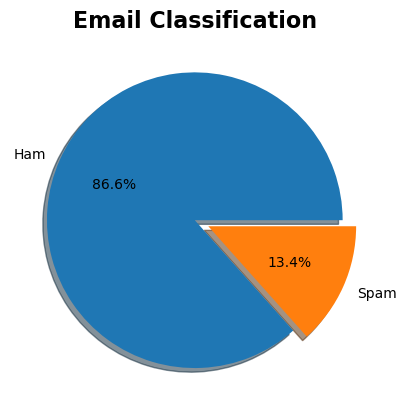

In [16]:
plt.pie(values, labels = ['Ham' , 'Spam'], explode = (0, 0.1), shadow = True ,autopct='%1.1f%%')
plt.title('Email Classification', fontsize=16, fontweight='bold')
plt.show() 

# Data Preprocessing

In [17]:
# Separate the feature (v2) and target (category) data
x=spam['Message']
y=spam['Spam']


In [18]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Spam, Length: 5572, dtype: int64

#  Split Data to Train and Test Data

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

# Feature Extraction

In [21]:
#TF-IDF Vectorizer
import nltk
from nltk.corpus import stopwords

feature_extraction = TfidfVectorizer( stop_words="english", lowercase=True)

x_train = feature_extraction.fit_transform(x_train)

x_test = feature_extraction.transform(x_test)


In [22]:
print(x_train)

  (0, 3903)	0.5840594322397737
  (0, 4003)	0.46657331259311235
  (0, 6010)	0.6642167745455116
  (1, 3672)	0.5737163408939943
  (1, 2154)	0.8190540642663378
  (2, 3075)	0.33120665478779976
  (2, 3300)	0.49958507974919814
  (2, 4618)	0.49958507974919814
  (2, 5805)	0.45920583434234813
  (2, 3583)	0.24009735816969147
  (2, 1763)	0.3501641162571242
  (3, 3891)	0.4204111980396913
  (3, 5240)	0.3598285896676375
  (3, 4575)	0.3968396805141732
  (3, 5042)	0.4352991391821672
  (3, 4512)	0.39499483252028933
  (3, 4525)	0.4367949407898085
  (4, 6294)	0.6377939232039059
  (4, 4519)	0.6377939232039059
  (4, 6409)	0.43178446364863604
  (5, 3991)	0.6135272724876246
  (5, 3553)	0.544325718242287
  (5, 2937)	0.5720959695487414
  (6, 1165)	0.3172200192789814
  (6, 5522)	0.36426180641364037
  :	:
  (3894, 2989)	0.5016704832029851
  (3895, 6289)	0.8551055944400807
  (3895, 3672)	0.5184538767887424
  (3896, 6646)	0.3911407694662482
  (3896, 4249)	0.3493491060351844
  (3896, 4126)	0.35952659650729857
  (389

# Model Selection and Training

In [23]:
# Create and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
#Make predictions on the training data
predict_train_data=model.predict(x_train)


accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.97


In [25]:
# Make predictions on the testing data
predict_test_data=model.predict(x_test)

accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9545454545454546


# Test the model with an email messages

In [26]:
new_mail=["I am going to office with Rajesh"]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


# Confusion Matrix

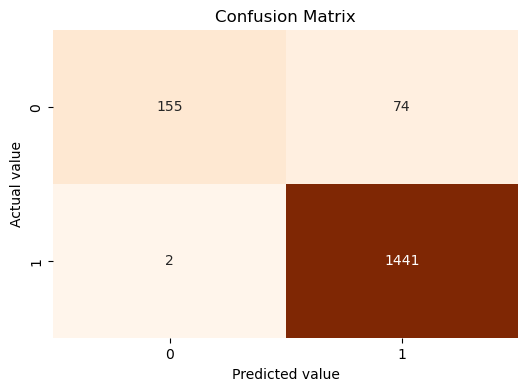

In [27]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

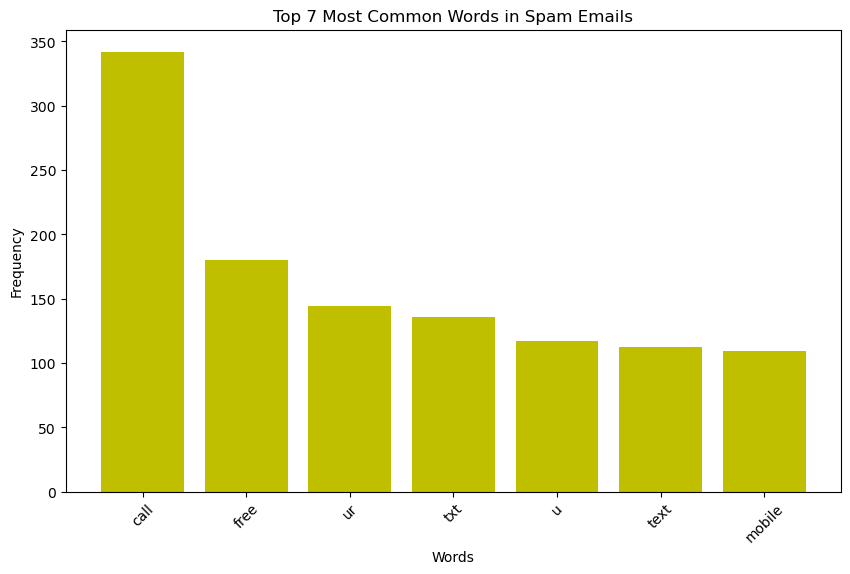

In [28]:
# Data visualization - Top 7 Most Common Words in Spam Emails
from collections import Counter

stop_words = set(stopwords.words('english'))
spam_words = " ".join(spam[spam['Spam'] == 0]['Message']).split()
ham_words = " ".join(spam[spam['Spam'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

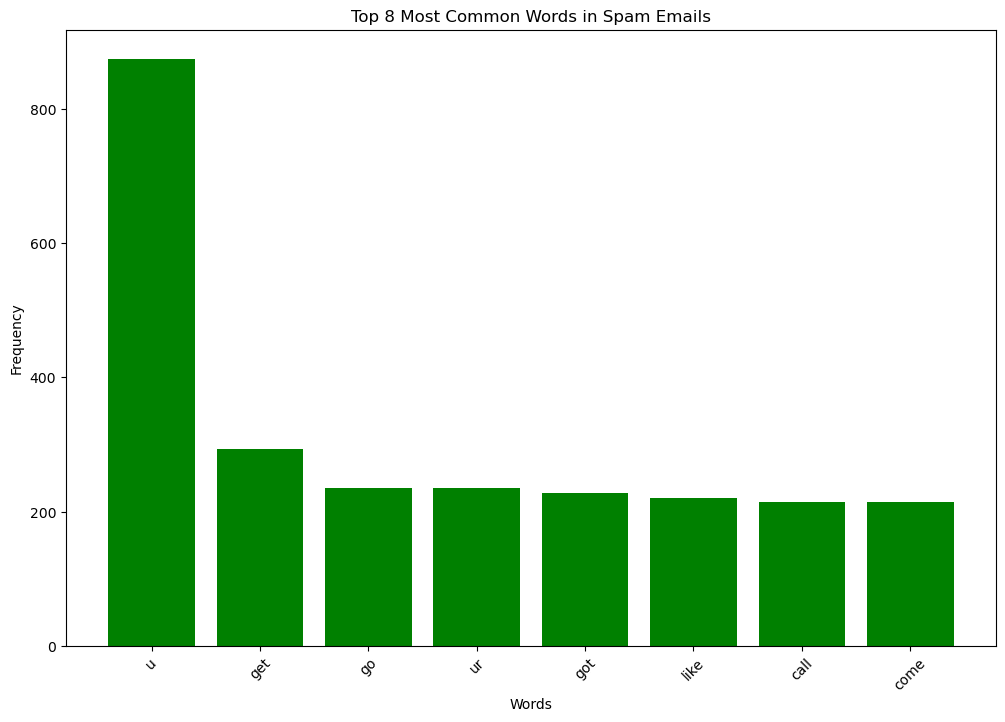

In [29]:
# Data visualization - Top 7 Most Common Words in Ham Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(spam[spam['Spam'] == 0]['Message']).split()
ham_words = " ".join(spam[spam['Spam'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(12,8))
plt.bar(*zip(*spam_word_freq.most_common(8)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 8 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()